Step #1: Installing the Necessary Libraries

In [1747]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step #2: download dataset
Step #3: Import and Checking the Dataset

In [1748]:
### Loading the Dataset
data = pd.read_csv("House_Rent_Dataset.csv")
data.head(10)

data.info()

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Step #4: Simple Exploratory Data Analysis

<BarContainer object of 6 artists>

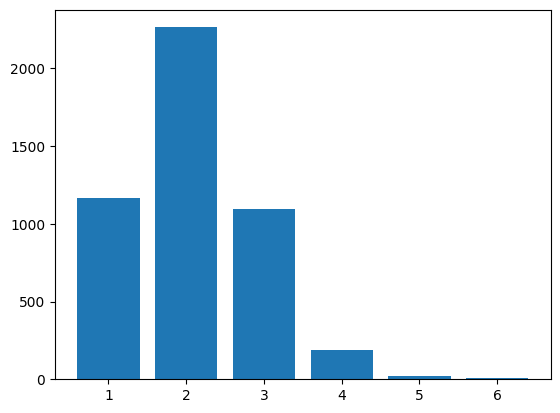

In [1749]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

C:\Users\User\AppData\Local\Temp\ipykernel_252\2085740626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

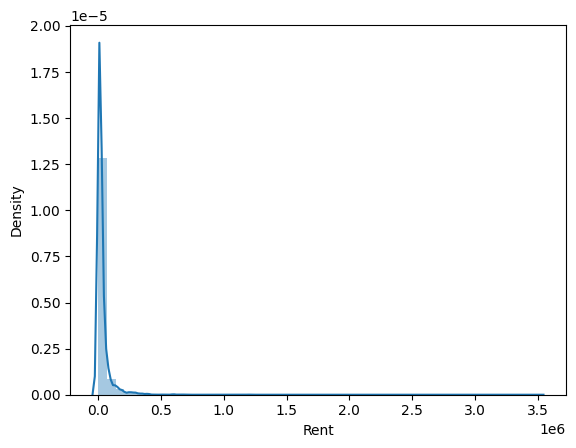

In [1750]:
sns.distplot(data['Rent'])


C:\Users\User\AppData\Local\Temp\ipykernel_252\694979484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

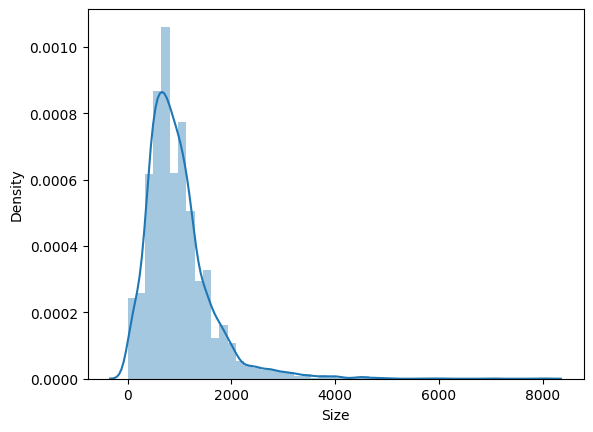

In [1751]:
sns.distplot(data['Size'])


In [1752]:
data['Floor'].value_counts()


Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [1753]:
data['Furnishing Status'].value_counts()


Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [1754]:
data['Area Locality'].value_counts()

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2235, dtype: int64

Cleaning a bit

In [1755]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [1756]:
data['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [1757]:
data['Area Locality'].nunique()

2235

In [1758]:
data['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [1759]:
data['Area Locality'].value_counts().iloc[25:50]

Area Locality
Murugeshpalya, Airport Road                 14
Kasba                                       13
Salt Lake City Sector 5                     13
Old Mahabalipuram Road                      13
Kukatpally, NH 9                            13
Mahadevapura                                13
kst chattarpur Apartments                   13
Ramamurthy Nagar                            12
Hebbal                                      12
Vijayanagar                                 12
whitefield                                  12
Saket                                       12
Porur                                       12
Goregaon West                               12
Khar West                                   12
Electronic City Phase 2, Electronic City    11
Madhapur                                    11
Bandlaguda Jagir                            11
Nallagandla, Serilingampally                11
Jubilee Hills                               11
Sainikpuri                                  11

In [1760]:
# Function to update 'Area Locality' column
def update_locality(locality):
    parts = locality.split(', ')
    return parts[-1]  # Take the last part after splitting by comma

# Apply the function to update the 'Area Locality' column
# data['Area Locality'] = data['Area Locality'].apply(update_locality)

print(data)

       Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Ka

In [1761]:
data['Floor'].value_counts()

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [1762]:
# # Function to update the Floor values to number value
# def update_floor_value(value):
#     if 'Ground' in value:
#         return value.replace('Ground', '1')
#     elif 'Upper Basement' in value:
#         return value.replace('Upper Basement', '-1')
#     elif 'Lower Basement' in value:
#         return value.replace('Lower Basement', '-2')
#     else:
#         return value
    
# data['Floor'] = data['Floor'].apply(update_floor_value)

# Function to update the Floor values to number value
def update_floor_value(value):
    if 'Ground' in value:
        return value.replace('Ground', '1')
    elif 'Upper Basement' in value:
        return None  # Return None to drop the row
    elif 'Lower Basement' in value:
        return None  # Return None to drop the row
    else:
        return value
    
data['Floor'] = data['Floor'].apply(update_floor_value)

# Drop rows with None values in the 'Floor' column
data.dropna(subset=['Floor'], inplace=True)

In [1763]:
# Function to check if left value is greater than right. drop if not
def check_greater_left_value(row):
    if " out of " in row:
        test = row.split(" out of ")
        if int(test[0]) > int(test[1]):
            print(test)
            row = "{} out of {}".format(test[1], test[0])
            return row
        else:
            return row
    else:
        return row
    
data['Floor'] = data['Floor'].apply(check_greater_left_value)

['8', '5']
['2', '1']


In [1764]:
# Function to extract total floors 
def extract_total_floors(floor):
    if 'out of' in floor:
        return int(floor.split('out of')[-1].strip())
    else:
        return int(floor)

# Apply the function to create the 'Total Floors' column
data['Total Floors'] = data['Floor'].apply(extract_total_floors)

print(data.head(5))

    Posted On  BHK   Rent  Size       Floor    Area Type  \
0  2022-05-18    2  10000  1100  1 out of 2   Super Area   
1  2022-05-13    2  20000   800  1 out of 3   Super Area   
2  2022-05-16    2  17000  1000  1 out of 3   Super Area   
3  2022-07-04    2  10000   800  1 out of 2   Super Area   
4  2022-05-09    2   7500   850  1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  Total Floors  
0         2    Contact Owner             2  
1         1    Contact Owner             3  
2         1    Contact Owner             3  
3 

In [1765]:
# type of building
# Low-rise buildings are defined as buildings with 4 floors or under.
# Mid-rise buildings are defined as buildings that have between 5 to 12 floors.
# High-rise buildings are defined as buildings that have 13 floors or above.
# Skyscrapers are buildings with over 40 floors and are considered part of the high-rise category. 

# Function to determine the type of building
def determine_building_type(total_floors):
    if total_floors <= 4:
        return 'Low-rise'
    elif 5 <= total_floors <= 12:
        return 'Mid-rise'
    elif total_floors >= 13:
        if total_floors > 40:
            return 'Skyscrapers'
        else:
            return 'High-rise'
        
data['Type of Building'] = data['Total Floors'].apply(determine_building_type)
print(data)

       Posted On  BHK   Rent  Size         Floor    Area Type  \
0     2022-05-18    2  10000  1100    1 out of 2   Super Area   
1     2022-05-13    2  20000   800    1 out of 3   Super Area   
2     2022-05-16    2  17000  1000    1 out of 3   Super Area   
3     2022-07-04    2  10000   800    1 out of 2   Super Area   
4     2022-05-09    2   7500   850    1 out of 2  Carpet Area   
...          ...  ...    ...   ...           ...          ...   
4741  2022-05-18    2  15000  1000    3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000    1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750    3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500  23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000    4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnish

In [1766]:
# Function to extract the rented floor information
def extract_rented_floor(floor):
    if 'out of' in floor:
        return int(floor.split(' out of ')[0].strip())
    else:
        return int(floor)

# Apply the function to create the 'Floor Rented' column
data['Floor Rented'] = data['Floor'].apply(extract_rented_floor)

print(data)

       Posted On  BHK   Rent  Size         Floor    Area Type  \
0     2022-05-18    2  10000  1100    1 out of 2   Super Area   
1     2022-05-13    2  20000   800    1 out of 3   Super Area   
2     2022-05-16    2  17000  1000    1 out of 3   Super Area   
3     2022-07-04    2  10000   800    1 out of 2   Super Area   
4     2022-05-09    2   7500   850    1 out of 2  Carpet Area   
...          ...  ...    ...   ...           ...          ...   
4741  2022-05-18    2  15000  1000    3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000    1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750    3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500  23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000    4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnish

In [1767]:
# Get value counts of each area locality
value_counts = data['Area Locality'].value_counts()

# Create a dictionary to map each area locality to its count
locality_counts = dict(zip(value_counts.index, value_counts.values))

# Map the counts to the 'Area Locality' column to create the 'Area Locality Popularity' column
data['Area Locality Popularity'] = data['Area Locality'].map(locality_counts)

data['Area Locality Popularity'].value_counts()

Area Locality Popularity
1     1456
2      654
3      426
4      328
5      245
6      228
8      224
7      189
11     154
14     112
10     100
12      84
9       81
13      78
17      68
16      48
15      45
22      44
19      38
37      37
29      29
24      24
20      20
Name: count, dtype: int64

Step #5: Preprocessing (Encoding)

In [1768]:
data = data[['BHK', 
             'Size',
             'Bathroom',
             'Floor Rented',
             'Total Floors',
             'Area Locality Popularity', 
             'Type of Building',
             'Area Type',
             'City',
             'Furnishing Status',
             'Tenant Preferred', 
             'Point of Contact', 
             'Rent'
             ]]

In [1769]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [1770]:

data = one_hot_encode(data, 'Area Type')
data = one_hot_encode(data, 'City')
data = one_hot_encode(data, 'Furnishing Status')
data = one_hot_encode(data, 'Type of Building')
data = one_hot_encode(data, 'Tenant Preferred')
data = one_hot_encode(data, 'Point of Contact')
data

,BHK,Size,Bathroom,Floor Rented,Total Floors,Area Locality Popularity,Rent,Carpet Area,Super Area,Chennai,...,Mumbai,Semi-Furnished,Unfurnished,Low-rise,Mid-rise,Skyscrapers,Bachelors/Family,Family,Contact Builder,Contact Owner
0,2,1100,2,1,2,2,10000,False,True,False,...,False,False,True,True,False,False,True,False,False,True
1,2,800,1,1,3,2,20000,False,True,False,...,False,True,False,True,False,False,True,False,False,True
2,2,1000,1,1,3,16,17000,False,True,False,...,False,True,False,True,False,False,True,False,False,True
3,2,800,1,1,2,2,10000,False,True,False,...,False,False,True,True,False,False,True,False,False,True
4,2,850,1,1,2,1,7500,True,False,False,...,False,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,2,3,5,2,15000,True,False,False,...,False,True,False,False,True,False,True,False,False,True
4742,3,2000,3,1,4,1,29000,False,True,False,...,False,True,False,True,False,False,True,False,False,True
4743,3,1750,3,3,5,9,35000,True,False,False,...,False,True,False,False,True,False,True,False,False,False
4744,3,1500,2,23,34,29,45000,True,False,False,...,False,True,False,False,False,False,False,True,False,False


In [1771]:
# Define the lower and upper bounds for outlier detection
Q1 = data['Rent'].quantile(0.25)
Q3 = data['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using boolean indexing
outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)

# Remove outliers
data = data[~outliers]

Step #5: Preprocessing (Training and Test Split)

In [1772]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [1773]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

Step #5: Preprocessing (Standardization)

In [1774]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Step #6: Modelling

In [1775]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 2448.6464269 ,  3695.48603225,  1716.97708767,   -10.87297448,
        1122.76144824,   395.68954951,   876.11857078,   680.92778595,
        -432.15631018,   903.18410781, -1038.15360312,  -928.06027464,
        5718.45662971, -1742.10050945, -2209.47777231, -1006.62800019,
        -394.34414738,   347.73356311,  -397.59929015,  -829.39174244,
           0.        , -3219.44177013])

Step #7: Evaluation

In [1776]:
### Quantitative Evaluation
y_preds = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 2448.6464269   3695.48603225  1716.97708767   -10.87297448
  1122.76144824   395.68954951   876.11857078   680.92778595
  -432.15631018   903.18410781 -1038.15360312  -928.06027464
  5718.45662971 -1742.10050945 -2209.47777231 -1006.62800019
  -394.34414738   347.73356311  -397.59929015  -829.39174244
     0.         -3219.44177013]
Mean squared error: 51750588.36
Coefficient of determination: 0.71


In [1777]:
### Qualitative Evaluation
sample_data = X.iloc[0]

sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))
sample_data_standardized

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.04837761,  0.46914689,  0.25820806, -0.51509422, -0.54435476,
        -0.6112794 , -0.88415569,  0.88522637, -0.50883378, -0.3910511 ,
        -0.49860244,  2.75727476, -0.40462124, -0.9417811 ,  1.20966495,
         0.65813998, -0.50418807, -0.05735393,  0.60087833, -0.31679769,
         0.        ,  0.57838279]])

In [1778]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

12772.520675374335

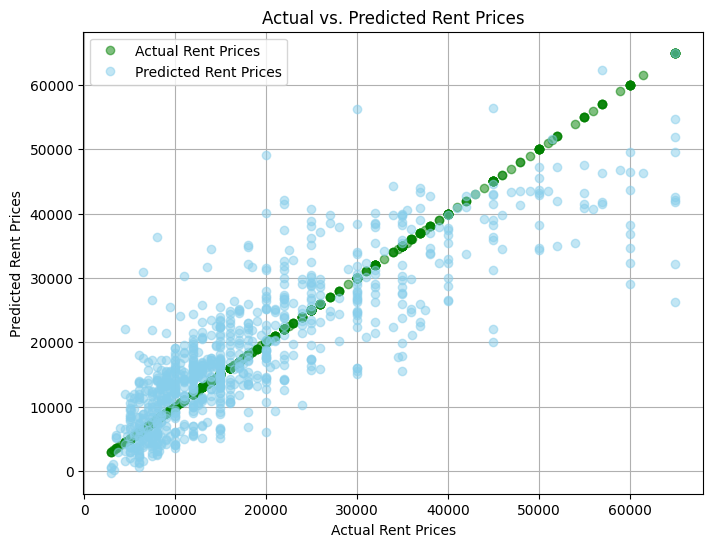

In [1779]:
plt.figure(figsize=(8,6))
plt.plot(y_test, y_test, 'o', alpha=0.5, color='green', label='Actual Rent Prices')
plt.plot(y_test, y_preds, 'o', alpha=0.5, color='skyblue', label='Predicted Rent Prices')

plt.title("Actual vs. Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")

plt.legend()
plt.grid(True)
plt.show()